In [1]:
import pandas as pd 
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Price', parse_dates=True)

bitcoin.drop(['Ticker', 'Date'], axis=0, inplace=True)

bitcoin.index.name =  'Date'

bitcoin.index = pd.to_datetime(bitcoin.index, format='%Y-%m-%d')
bitcoin.head()


/var/folders/c1/x0svcq3j1lg3v8yk8cwqk59c0000gn/T/ipykernel_81130/555690528.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Price', parse_dates=True)


,Close,High,Low,Open,Volume
Date,,,,,
2024-01-01,38291.8359375,38768.875,37988.5546875,38127.7109375,14855969946
2024-01-02,40018.60546875,40025.59375,38219.16015625,38305.46875,16696095504
2024-01-03,41089.29296875,41609.734375,40027.3203125,40036.55078125,35950434827
2024-01-04,39215.98046875,41576.94921875,37371.3203125,41092.61328125,42413930730
2024-01-05,40360.08203125,40898.17578125,39071.59765625,39222.96875,27815518796


In [3]:
bitcoin[['Close', 'High', 'Low', 'Open','Volume']] = bitcoin[['Close', 'High', 'Low', 'Open', 'Volume']].astype('float64')

<Axes: title={'center': "evolution des prix du bitcoin au cour de l'annee 2024"}, xlabel='Date'>

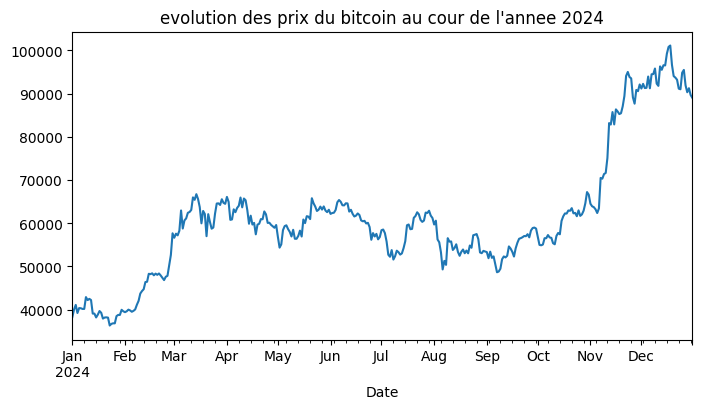

In [4]:
#observation de l'evolution des prix du bitcoin au cour de l'annees 

bitcoin['Close'].plot(figsize=(8,4), label='Bitcoin' , title='evolution des prix du bitcoin au cour de l\'annee 2024')  

Text(0, 0.5, 'Cost')

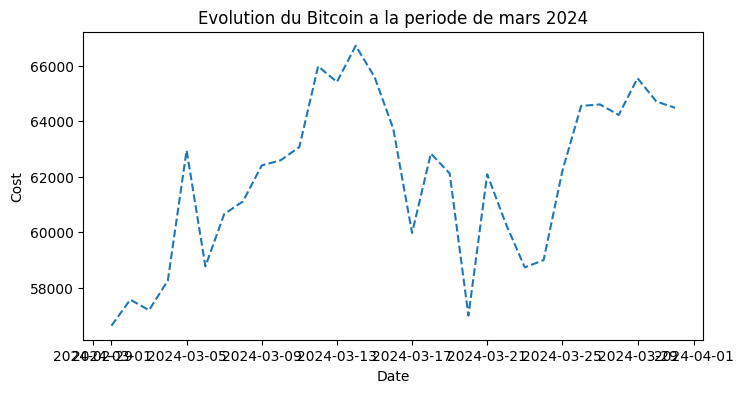

In [5]:
#observer les valeurs du bitcoin sur periode de temps precis 

fig ,ax =  plt.subplots(figsize=(8,4), sharex=True)
period = bitcoin.loc['2024-03', ['Close']]

ax.plot(period['Close'],ls='--')
ax.set_title('Evolution du Bitcoin a la periode de mars 2024')
ax.set_xlabel('Date')
ax.set_ylabel('Cost')


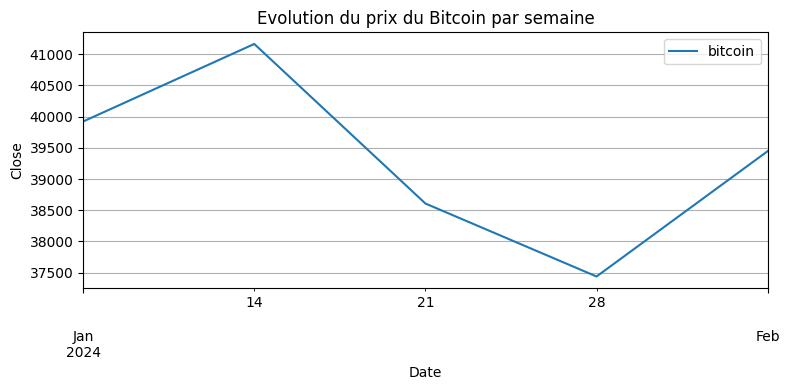

In [6]:
# Evolution du hebdomadaire du Bitcoin Tout au long du mois de Janvier 
weekly_values =bitcoin.loc['2024-01','Close'].resample('W').mean()
plt.figure(figsize=(8,4))

weekly_values.plot(
    xlabel='Date',
    ylabel='Close',
    title='Evolution du prix du Bitcoin par semaine',
    label = 'bitcoin'
)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

/var/folders/c1/x0svcq3j1lg3v8yk8cwqk59c0000gn/T/ipykernel_81130/2835653045.py:8: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  bitcoin.loc['2024-02', 'Close'].resample('w').mean().plot(ax=ax ,label='representation Hebdomadaire ')


Text(0, 0.5, 'Cost')

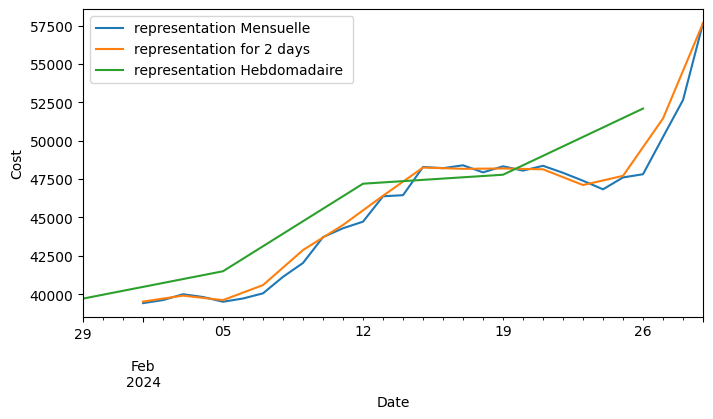

In [12]:

#representation Mensuelle 

fig, ax = plt.subplots(figsize=(8,4))


bitcoin.loc['2024-02', 'Close'].plot(ax=ax ,label='representation Mensuelle ')
bitcoin.loc['2024-02', 'Close'].resample('2d').mean().plot(ax=ax ,label='representation for 2 days ')
bitcoin.loc['2024-02', 'Close'].resample('w').mean().plot(ax=ax ,label='representation Hebdomadaire ')
plt.legend()
plt.ylabel('Cost')





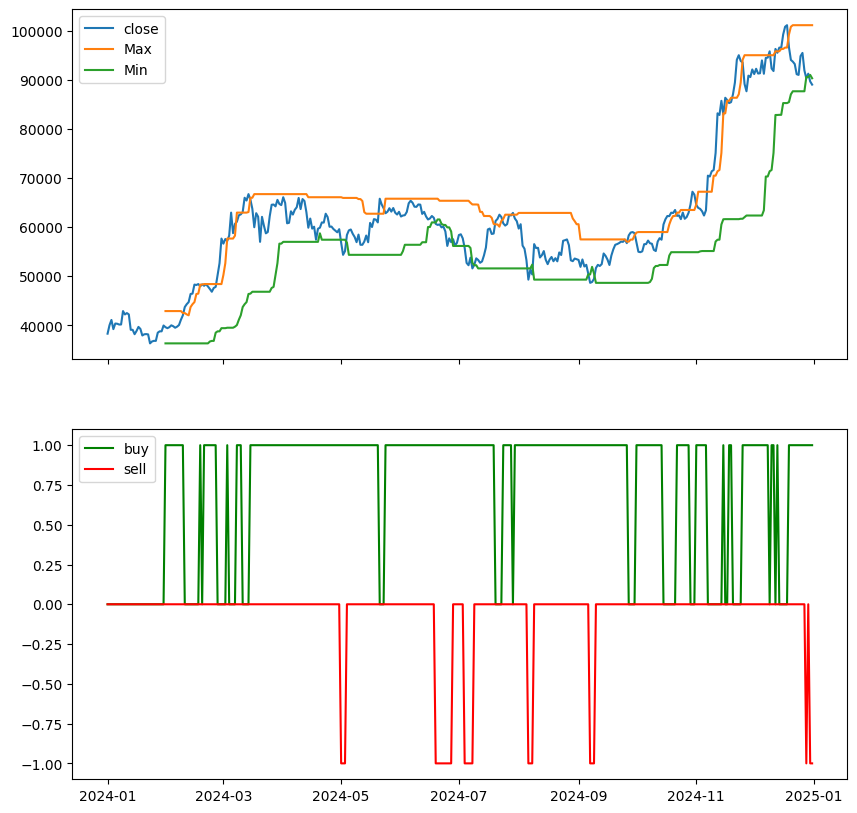

In [13]:
data = bitcoin.copy()


data['buy'] = np.zeros(len(data))
data['sell'] =  np.zeros(len(data))

data['rolling_max'] =  data['Close'].shift(3).rolling(window=28).max()
data['rolling_min'] =  data['Close'].shift(3).rolling(window=28).min()
data['Close']< data['rolling_max']

data.loc[data['Close'] < data['rolling_max'], 'buy'] = 1 
data.loc[data['Close'] <  data['rolling_min'],'sell']= -1


fig , ax = plt.subplots(2,figsize=(10,10) ,  sharex=True)

ax[0].plot(data['Close'])
ax[0].plot(data['rolling_max'])
ax[0].plot(data['rolling_min'])
ax[0].legend(['close', 'Max', 'Min'])

ax[1].plot(data['buy'], c='g')
ax[1].plot(data['sell'], c='r')
ax[1].legend(['buy', 'sell'])

